# Generating Independent Test Set for Traffic Sign Classification
## Loading in Images

In [19]:
import pandas as pd
import numpy as np
from PIL import Image, ImageOps
from IPython import display
import os

In [2]:
images = pd.read_csv("Test.csv")

In [4]:
images.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [5]:
images.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000
mean,50.507759,50.364450,5.998021,5.982423,44.864450,44.758116,15.551069
std,25.088483,23.698908,1.543954,1.427424,23.776102,22.494697,11.947123
min,25.000000,25.000000,1.000000,5.000000,20.000000,20.000000,0.000000
25%,34.000000,35.000000,5.000000,5.000000,29.000000,29.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,57.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,266.000000,232.000000,23.000000,19.000000,244.000000,212.000000,42.000000


In [7]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12630 entries, 0 to 12629
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    12630 non-null  int64 
 1   Height   12630 non-null  int64 
 2   Roi.X1   12630 non-null  int64 
 3   Roi.Y1   12630 non-null  int64 
 4   Roi.X2   12630 non-null  int64 
 5   Roi.Y2   12630 non-null  int64 
 6   ClassId  12630 non-null  int64 
 7   Path     12630 non-null  object
dtypes: int64(7), object(1)
memory usage: 789.5+ KB


In [10]:
sampled_images = images.sample(n = 200, random_state = 0)

In [13]:
sampled_images

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
6659,53,49,5,6,48,44,25,Test/06659.png
7633,44,42,5,6,39,37,11,Test/07633.png
1678,34,36,6,6,28,30,38,Test/01678.png
5938,38,42,5,6,33,37,38,Test/05938.png
11949,49,50,5,6,44,45,8,Test/11949.png
...,...,...,...,...,...,...,...,...
3639,29,30,5,5,24,25,38,Test/03639.png
8301,50,55,6,6,44,50,25,Test/08301.png
11648,32,33,5,6,27,28,15,Test/11648.png
6446,36,37,5,6,30,31,1,Test/06446.png


In [18]:
len(sampled_images)

200

In order to label the traffic sign images with the same classes that our models have been trained to recognize, we will need to manually annotate the sign-shape and sign-types.

This approach will be streamlined by creating a 

In [128]:
def manualImageLabelling(images, dataDict):
    dataDict["shape"] = []
    dataDict["type"] = []
    for i in range(len(images)):
        display.clear_output(wait=True)
        display.display(display.Image(images.iloc[i,7], width=images.iloc[i,1]*5, height=images.iloc[i,2]*5))
        temp = True
        while temp:
            signShape = input("What Shape?: ")
            if signShape in ['triangle','round','square','diamond','hex']:
                dataDict["shape"].append(signShape)
                temp = False
        temp = True
        while temp:
            signType = input("What Type?: ")
            if signType in ['warning','noentry','speed','bicycle','rightofway','parking',
                           'noparking','giveway','continue','trafficdirective',
                           'limitedtraffic','traveldirection','laneend', 'roundabout',
                           'crossing','stop', 'other']:
                dataDict["type"].append(signType)
                temp = False 

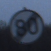

What Shape?: round
What Type?: speed


In [130]:
#dataDict = {}
#manualImageLabelling(sampled_images, dataDict)

In [131]:
dataDict

{'shape': ['triangle',
  'triangle',
  'round',
  'round',
  'round',
  'round',
  'round',
  'diamond',
  'triangle',
  'triangle',
  'hex',
  'round',
  'round',
  'triangle',
  'triangle',
  'round',
  'round',
  'diamond',
  'round',
  'triangle',
  'round',
  'triangle',
  'round',
  'round',
  'round',
  'triangle',
  'triangle',
  'round',
  'round',
  'round',
  'round',
  'round',
  'round',
  'triangle',
  'round',
  'round',
  'diamond',
  'round',
  'triangle',
  'triangle',
  'round',
  'round',
  'triangle',
  'triangle',
  'round',
  'round',
  'round',
  'round',
  'round',
  'round',
  'triangle',
  'triangle',
  'round',
  'diamond',
  'round',
  'round',
  'round',
  'round',
  'triangle',
  'triangle',
  'round',
  'round',
  'round',
  'triangle',
  'round',
  'round',
  'round',
  'round',
  'round',
  'round',
  'triangle',
  'triangle',
  'round',
  'triangle',
  'triangle',
  'round',
  'round',
  'triangle',
  'round',
  'round',
  'round',
  'round',
  'trian

In [134]:
pd.DataFrame(dataDict)

,shape,type
0,triangle,warning
1,triangle,warning
2,round,traveldirection
3,round,traveldirection
4,round,speed
...,...,...
195,round,traveldirection
196,triangle,warning
197,round,limitedtraffic
198,round,speed


In [137]:
test = sampled_images.reset_index()
test

,index,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,6659,53,49,5,6,48,44,25,Test/06659.png
1,7633,44,42,5,6,39,37,11,Test/07633.png
2,1678,34,36,6,6,28,30,38,Test/01678.png
3,5938,38,42,5,6,33,37,38,Test/05938.png
4,11949,49,50,5,6,44,45,8,Test/11949.png
...,...,...,...,...,...,...,...,...,...
195,3639,29,30,5,5,24,25,38,Test/03639.png
196,8301,50,55,6,6,44,50,25,Test/08301.png
197,11648,32,33,5,6,27,28,15,Test/11648.png
198,6446,36,37,5,6,30,31,1,Test/06446.png


In [141]:
annotated_imgs = pd.concat([sampled_images.reset_index(drop=True),
                            pd.DataFrame(dataDict)], axis=1)

In [142]:
annotated_imgs.to_csv("annotated_imgs.csv",index=False)

In [2]:
annotated_imgs = pd.read_csv("annotated_imgs.csv")

In [3]:
annotated_imgs

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,shape,type
0,53,49,5,6,48,44,25,Test/06659.png,triangle,warning
1,44,42,5,6,39,37,11,Test/07633.png,triangle,warning
2,34,36,6,6,28,30,38,Test/01678.png,round,traveldirection
3,38,42,5,6,33,37,38,Test/05938.png,round,traveldirection
4,49,50,5,6,44,45,8,Test/11949.png,round,speed
...,...,...,...,...,...,...,...,...,...,...
195,29,30,5,5,24,25,38,Test/03639.png,round,traveldirection
196,50,55,6,6,44,50,25,Test/08301.png,triangle,warning
197,32,33,5,6,27,28,15,Test/11648.png,round,limitedtraffic
198,36,37,5,6,30,31,1,Test/06446.png,round,speed


In [33]:
dataDict = {}
dataDict["path"] = []
dataDict["sign_shapes"] = annotated_imgs["shape"]
dataDict["sign_types"] = annotated_imgs["type"]

for index, row in annotated_imgs.iterrows():
    # Getting Image Path and Image Filename
    img_path = annotated_imgs["Path"][index]
    img_filename = img_path.split("/")[1]
    
    # Loading Image & Preprocessing To Match Training Examples
    img = Image.open(img_path)
    resized_img = img.resize((28,28))
    grayscale_img = ImageOps.grayscale(resized_img)
    
    # Saving Image to Output Directory
    output_path = f"preprocessedTestData/{img_filename}"
    dataDict["path"].append(output_path)
    grayscale_img.save(output_path)

In [37]:
preprocessed_annotated_imgs = pd.DataFrame(dataDict)

In [38]:
preprocessed_annotated_imgs.to_csv("preprocessed_annotated_imgs.csv",index=False)